In [1]:
from modules.stats_v3 import *
from modules.helper_functions_v3 import *
from modules.plot_functions_v3 import *

import random

import __main__
from sys import argv
import os

In [2]:
plot_pretty()

In [3]:
caterpillar_dir = '../../caterpillar_zrei8_5_fix'
caterpillar_names = [name for name in os.listdir(caterpillar_dir) if os.path.isdir(caterpillar_dir+'/'+name)]

elvis_dir = '../../elvis_isolated'
elvis_names = [name for name in os.listdir(elvis_dir) if os.path.isdir(elvis_dir+'/'+name)]

suite_names = elvis_names + caterpillar_names
executed_as_300kpc = True
name_extension = "_300kpc"
select_by_Rvir = not executed_as_300kpc

savefig = True

Running for iCher
Running for iKauket
Running for iSerena
Running for iRoy
Running for iOrion
Running for iVenus
Running for iRemus
Running for iRomulus
Running for iTaurus
Running for iBurr
Running for iHera
Running for iCharybdis
Running for iHall
Running for iOates
Running for iZeus
Running for iThelma
Running for iLincoln
Running for iSiegfried
Running for iKek
Running for iLouise
Running for iScylla
Running for iSonny
Running for iHamilton
Running for iDouglas
Running for caterpillar_22_LX14
Running for caterpillar_18_LX14
Running for caterpillar_8_LX14
Running for caterpillar_14_LX14
Running for caterpillar_4_LX14
Running for caterpillar_5_LX14
Running for caterpillar_15_LX14
Running for caterpillar_19_LX14
Running for caterpillar_23_LX14
Running for caterpillar_12_LX14
Running for caterpillar_53_LX14
Running for caterpillar_2_LX14
Running for caterpillar_24_LX14
Running for caterpillar_33_LX14
Running for caterpillar_25_LX14
Running for caterpillar_3_LX14
Running for caterpillar

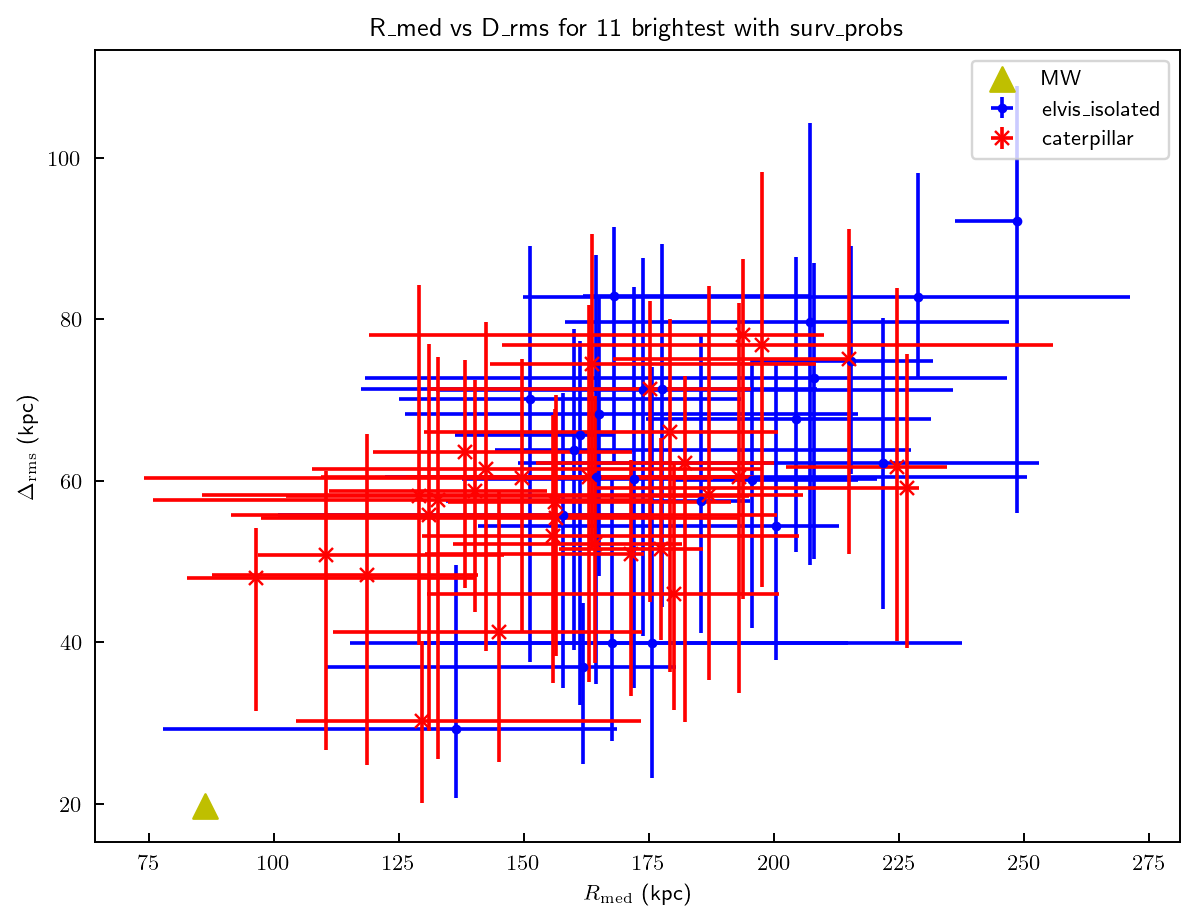

In [4]:
D_rms_elvis_isolated = []
D_rms_caterpillar = []

R_med_elvis_isolated = []
R_med_caterpillar = []

D_rms_elvis_isolated_upper = []
D_rms_caterpillar_upper = []

R_med_elvis_isolated_upper = []
R_med_caterpillar_upper = []

D_rms_elvis_isolated_lower = []
D_rms_caterpillar_lower = []

R_med_elvis_isolated_lower = []
R_med_caterpillar_lower = []

k = 11

fig, ax = plt.subplots(figsize=(8,6))

for suite_name in suite_names:
  print(f"Running for {suite_name}")
  if suite_name[0] == 'i':
    suite_dir = '../../elvis_isolated'
    suite_name_decorated = elvis_name_template.substitute(suite_name=suite_name)
    data_dir = f'../../Data/log_elvis_isolated{name_extension}_v3'
    data_surv_probs_dir = f'../../Data/log_elvis_isolated{name_extension}_surv_probs_v3'
    save_dir = f'../../result_v3/elvis_isolated{name_extension}/{suite_name}'
    brightest_dir = f'../../Data/log_brightest_elvis_isolated{name_extension}_v3.1'
    D_rms = D_rms_elvis_isolated
    D_rms_upper = D_rms_elvis_isolated_upper
    D_rms_lower = D_rms_elvis_isolated_lower
    R_med = R_med_elvis_isolated
    R_med_upper = R_med_elvis_isolated_upper
    R_med_lower = R_med_elvis_isolated_lower
  else:
    suite_dir = '../../caterpillar_zrei8_5_fix'
    suite_name_decorated = caterpillar_name_template.substitute(suite_name=suite_name)
    data_dir = f'../../Data/log_caterpillar{name_extension}_v3'
    data_surv_probs_dir = f'../../Data/log_caterpillar{name_extension}_surv_probs_v3'
    save_dir = f'../../result_v3/caterpillar{name_extension}/{suite_name}'
    brightest_dir = f'../../Data/log_brightest_caterpillar{name_extension}_v3.1'
    D_rms = D_rms_caterpillar
    D_rms_upper = D_rms_caterpillar_upper
    D_rms_lower = D_rms_caterpillar_lower
    R_med = R_med_caterpillar
    R_med_upper = R_med_caterpillar_upper
    R_med_lower = R_med_caterpillar_lower

  data_brightest_sampled = pd.read_csv(f'{brightest_dir}/{suite_name}.csv', usecols=['D_rms','R_med',f'D_sph_{k}'])

  D_rms_halo = data_brightest_sampled['D_rms']
  R_med_halo = data_brightest_sampled['R_med']

  D_rms.append(np.median(D_rms_halo))
  R_med.append(np.median(R_med_halo))

  D_rms_upper.append(np.abs(np.percentile(D_rms_halo, 97.5)-np.median(D_rms_halo)))
  D_rms_lower.append(np.abs(np.percentile(D_rms_halo, 2.5)-np.median(D_rms_halo)))

  R_med_upper.append(np.abs(np.percentile(R_med_halo, 97.5)-np.median(R_med_halo)))
  R_med_lower.append(np.abs(np.percentile(R_med_halo, 2.5)-np.median(R_med_halo)))

R_med_elvis_isolated_error = [R_med_elvis_isolated_lower, R_med_elvis_isolated_upper]
D_rms_elvis_isolated_error = [D_rms_elvis_isolated_lower, D_rms_elvis_isolated_upper]

R_med_caterpillar_error = [R_med_caterpillar_lower, R_med_caterpillar_upper]
D_rms_caterpillar_error = [D_rms_caterpillar_lower, D_rms_caterpillar_upper]

ax.errorbar(R_med_elvis_isolated, D_rms_elvis_isolated, xerr=R_med_elvis_isolated_error, yerr=D_rms_elvis_isolated_error, fmt='.', color='b', label='elvis_isolated')
ax.errorbar(R_med_caterpillar, D_rms_caterpillar, xerr=R_med_caterpillar_error, yerr=D_rms_caterpillar_error, fmt='x', color='r', label='caterpillar')

data_MW = get_MW(is_D_rms=True, is_R_med=True, num_D_sph=k, num_D_sph_flipped=None)

D_rms_MW = data_MW['D_rms']
D_sph_MW = to_degree(data_MW['D_sph'])
R_med_MW = data_MW['R_med']

ax.scatter(R_med_MW, D_rms_MW, label='MW', marker='^', c='y', s=100)

ax.set_title(f'R_med vs D_rms for {k} brightest with surv_probs')
ax.set_xlabel(r'$R_{\rm med}$ (kpc)')
ax.set_ylabel(r'$\Delta_{\rm rms}$ (kpc)')


ax.legend()

if savefig:
  fig.savefig(f'../../result_v3/general/plot_R_medvs_D_rms_{k}_brightest_surv_probs.pdf')

Running for iCher
Running for iKauket
Running for iSerena
Running for iRoy
Running for iOrion
Running for iVenus
Running for iRemus
Running for iRomulus
Running for iTaurus
Running for iBurr
Running for iHera
Running for iCharybdis
Running for iHall
Running for iOates
Running for iZeus
Running for iThelma
Running for iLincoln
Running for iSiegfried
Running for iKek
Running for iLouise
Running for iScylla
Running for iSonny
Running for iHamilton
Running for iDouglas
Running for caterpillar_22_LX14
Running for caterpillar_18_LX14
Running for caterpillar_8_LX14
Running for caterpillar_14_LX14
Running for caterpillar_4_LX14
Running for caterpillar_5_LX14
Running for caterpillar_15_LX14
Running for caterpillar_19_LX14
Running for caterpillar_23_LX14
Running for caterpillar_12_LX14
Running for caterpillar_53_LX14
Running for caterpillar_2_LX14
Running for caterpillar_24_LX14
Running for caterpillar_33_LX14
Running for caterpillar_25_LX14
Running for caterpillar_3_LX14
Running for caterpillar

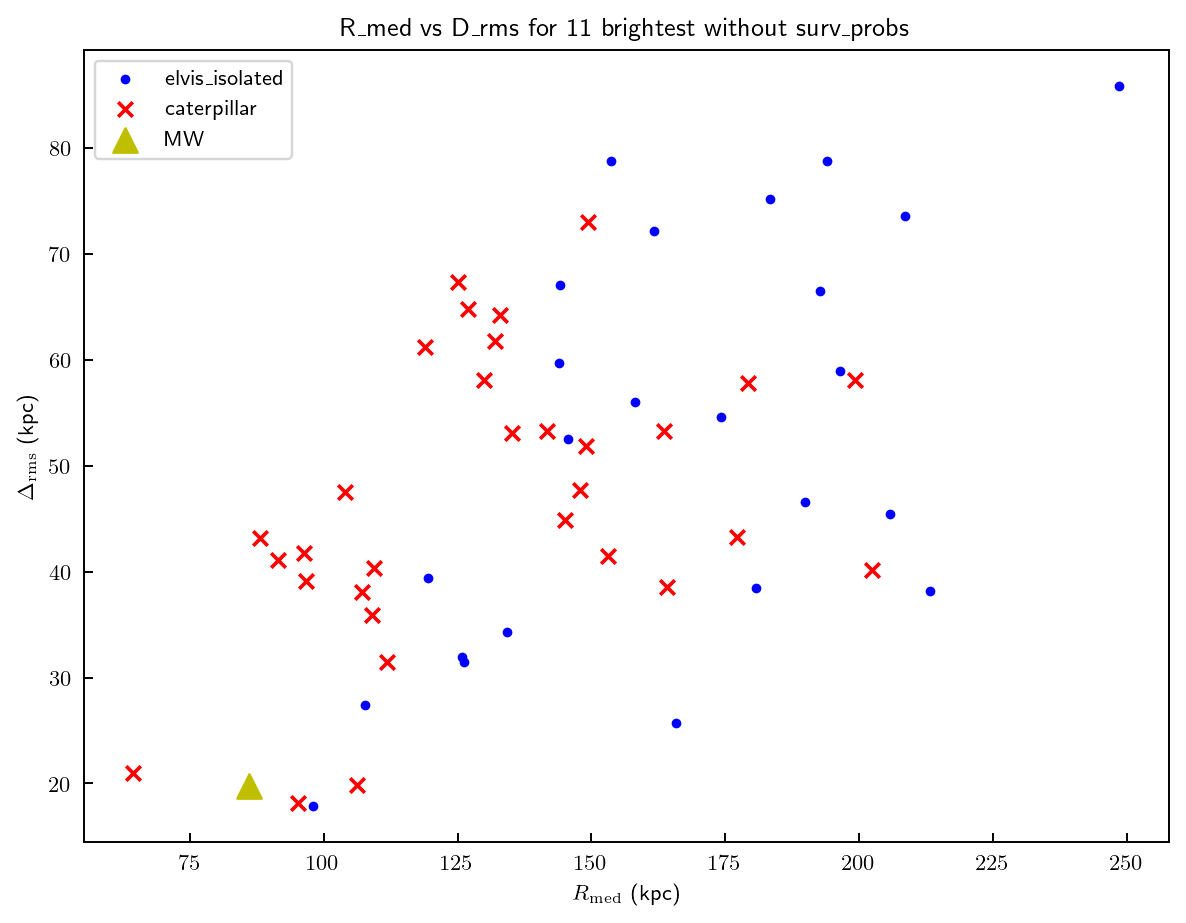

In [5]:
D_rms_elvis_isolated = []
D_rms_caterpillar = []

R_med_elvis_isolated = []
R_med_caterpillar = []

k = 11

fig, ax = plt.subplots(figsize=(8,6))

for suite_name in suite_names:
  print(f"Running for {suite_name}")
  if suite_name[0] == 'i':
    suite_dir = '../../elvis_isolated'
    suite_name_decorated = elvis_name_template.substitute(suite_name=suite_name)
    data_dir = f'../../Data/log_elvis_isolated{name_extension}_v3'
    data_surv_probs_dir = f'../../Data/log_elvis_isolated{name_extension}_surv_probs_v3'
    save_dir = f'../../result_v3/elvis_isolated{name_extension}/{suite_name}'
    brightest_dir = f'../../Data/log_brightest_elvis_isolated{name_extension}_v3.1'
    D_rms = D_rms_elvis_isolated
    R_med = R_med_elvis_isolated
  else:
    suite_dir = '../../caterpillar_zrei8_5_fix'
    suite_name_decorated = caterpillar_name_template.substitute(suite_name=suite_name)
    data_dir = f'../../Data/log_caterpillar{name_extension}_v3'
    data_surv_probs_dir = f'../../Data/log_caterpillar{name_extension}_surv_probs_v3'
    save_dir = f'../../result_v3/caterpillar{name_extension}/{suite_name}'
    brightest_dir = f'../../Data/log_brightest_caterpillar{name_extension}_v3.1'
    D_rms = D_rms_caterpillar
    R_med = R_med_caterpillar

  data = read_halo(suite_name_decorated, suite_dir)
  data_brightest = read_specific(data, is_surv_probs=False, select_by_Rvir=select_by_Rvir)

  D_rms.append(get_smallest_D_rms(data_brightest['pos'])['D_rms'])
  R_med.append(get_R_med(data_brightest['pos'])['R_med'])

ax.scatter(R_med_elvis_isolated, D_rms_elvis_isolated, marker='.', color='b', label='elvis_isolated')
ax.scatter(R_med_caterpillar, D_rms_caterpillar, marker='x', color='r', label='caterpillar')

data_MW = get_MW(is_D_rms=True, is_R_med=True, num_D_sph=k, num_D_sph_flipped=None)

D_rms_MW = data_MW['D_rms']
R_med_MW = data_MW['R_med']

ax.scatter(R_med_MW, D_rms_MW, label='MW', marker='^', c='y', s=100)

ax.set_title(f'R_med vs D_rms for {k} brightest without surv_probs')
ax.set_xlabel(r'$R_{\rm med}$ (kpc)')
ax.set_ylabel(r'$\Delta_{\rm rms}$ (kpc)')


ax.legend()

if savefig:
  fig.savefig(f'../../result_v3/general/plot_R_med_vs_D_rms_{k}_brightest_without_surv_probs.pdf')